# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [160]:
import numpy as np
import sklearn
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [161]:
df = pd.read_csv('/content/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [162]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [164]:
df.head(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [165]:
df.tail(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [166]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
246,13:13:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Public (13?45 seats),Owner,NaN,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,No priority to pedestrian,Slight Injury
3133,13:29:00,Wednesday,31-50,Male,Elementary school,Employee,5-10yr,Public (12 seats),Owner,NaN,...,Going straight,Driver or rider,Female,18-30,2,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
4747,19:57:00,Friday,Under 18,Male,High school,Owner,Above 10yr,Stationwagen,Governmental,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
664,8:05:00,Friday,31-50,Unknown,Junior high school,Employee,5-10yr,Special vehicle,Owner,NaN,...,Going straight,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
7790,8:01:00,Monday,18-30,Male,Above high school,Owner,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury


In [167]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [168]:
df.duplicated().sum()

0

In [169]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [170]:
df.drop(['Fitness_of_casuality'],axis=1,inplace=True)
df.drop(['Educational_level'],axis=1,inplace=True)
df.drop(['Vehicle_driver_relation'],axis=1,inplace=True)
df.drop(['Owner_of_vehicle'],axis=1,inplace=True)
df.drop(['Service_year_of_vehicle'],axis=1,inplace=True)
df.drop(['Sex_of_casualty'],axis=1,inplace=True)
df.drop(['Work_of_casuality'],axis=1,inplace=True)
df.drop(['Defect_of_vehicle'],axis=1,inplace=True)
df.drop(['Road_surface_type'],axis=1,inplace=True)
df.drop(['Road_surface_conditions'],axis=1,inplace=True)
df.drop(['Pedestrian_movement'],axis=1,inplace=True)
df.drop(['Time'], axis=1, inplace=True)

In [171]:
df.head(6)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Casualty_severity,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,1-2yr,Automobile,Residential areas,NaN,Tangent road with flat terrain,No junction,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,Moving Backward,Slight Injury
1,Monday,31-50,Male,Above 10yr,Public (> 45 seats),Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,Overtaking,Slight Injury
2,Monday,18-30,Male,1-2yr,Lorry (41?100Q),Recreational areas,other,NaN,No junction,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,31-50,3,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,5-10yr,Public (> 45 seats),Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,18-30,3,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,2-5yr,NaN,Industrial areas,other,Tangent road with flat terrain,Y Shape,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,Overtaking,Slight Injury
5,Friday,31-50,Male,NaN,NaN,NaN,NaN,NaN,Y Shape,Daylight,Normal,Vehicle with vehicle collision,1,1,U-Turn,Driver or rider,31-50,3,Overloading,Slight Injury


In [172]:
for col in df.columns:
  print(df[col].value_counts(), '\n')

Day_of_week
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: count, dtype: int64 

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64 

Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64 

Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64 

Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo  

##Handling Missing Values

In [173]:
df.isna().sum()

,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Driving_experience,829
Type_of_vehicle,950
Area_accident_occured,239
Lanes_or_Medians,385
Road_allignment,142
Types_of_Junction,887
Light_conditions,0


In [174]:
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)

In [175]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col].replace('na', df[col].mode()[0], inplace=True)
    df[col].replace('nan', df[col].mode()[0], inplace=True)
    df[col].replace('Unknown', df[col].mode()[0], inplace=True)


df['Age_band_of_casualty'].replace('na', np.nan, inplace=True)
df['Age_band_of_casualty'].fillna(df['Age_band_of_casualty'].mode()[0], inplace=True)

In [176]:
print(df.groupby('Driving_experience').size())

Driving_experience
1-2yr         1756
2-5yr         2613
5-10yr        3363
Above 10yr    2262
Below 1yr     1342
No Licence     118
unknown         33
dtype: int64


In [177]:
def bin_experience(exp):
    if pd.isna(exp) or exp == 'No Licence':
        return 'No experience'
    elif exp in ['Below 1yr', '1-2yr']:
        return 'Novice'
    elif exp in ['2-5yr', '5-10yr']:
        return 'Experienced'
    else:
        return 'Expert'

df['Driving_experience'] = df['Driving_experience'].apply(bin_experience)

In [178]:
df['Driving_experience'].value_counts()

,count
Driving_experience,
Experienced,5976
Novice,3098
Expert,2295
No experience,947


In [179]:
df.isna().sum()

,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Driving_experience,0
Type_of_vehicle,0
Area_accident_occured,0
Lanes_or_Medians,0
Road_allignment,0
Types_of_Junction,0
Light_conditions,0


In [180]:
df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Casualty_severity,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Novice,Automobile,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Driver or rider,18-30,3,Moving Backward,Slight Injury
1,Monday,31-50,Male,Expert,Public (> 45 seats),Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Driver or rider,18-30,3,Overtaking,Slight Injury
2,Monday,18-30,Male,Novice,Lorry (41?100Q),Recreational areas,other,Tangent road with flat terrain,No junction,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,31-50,3,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Experienced,Public (> 45 seats),Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,18-30,3,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Experienced,Automobile,Industrial areas,other,Tangent road with flat terrain,Y Shape,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Driver or rider,18-30,3,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,Experienced,Lorry (11?40Q),Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Driver or rider,18-30,3,No distancing,Slight Injury
12312,Sunday,18-30,Male,Experienced,Automobile,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Driver or rider,18-30,3,No distancing,Slight Injury
12313,Sunday,Over 51,Male,Experienced,Bajaj,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,31-50,3,Changing lane to the right,Serious Injury
12314,Sunday,18-30,Female,Expert,Lorry (41?100Q),Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Driver or rider,18-30,3,Driving under the influence of drugs,Slight Injury


In [181]:
import re

def clean_vehicle_type(value):
    match = re.match(r'([A-Za-z\s]+)', value)
    if match:
        return match.group(1).strip()
    return value

df['Type_of_vehicle'] = df['Type_of_vehicle'].apply(clean_vehicle_type)

replace_dict = {
    'Lorry': 'Lorry',
    'Long lorry': 'Lorry',
    'Pick up upto 10Q': 'Pick up',
    'Public': 'Public transport',
    'Public (12 seats)': 'Public transport',
    'Public (13 seats)': 'Public transport',
    'Public (> 45 seats)': 'Public transport'
}

df['Type_of_vehicle'] = df['Type_of_vehicle'].replace(replace_dict)


In [182]:
print(df.groupby('Type_of_vehicle').size())

Type_of_vehicle
Automobile          4155
Bajaj                 29
Bicycle               21
Lorry               3110
Motorcycle           177
Other               1208
Pick up upto         811
Public transport    1647
Ridden horse          76
Special vehicle       84
Stationwagen         687
Taxi                 265
Turbo                 46
dtype: int64


In [183]:
df['Age_band_of_casualty'].value_counts()

,count
Age_band_of_casualty,
18-30,7588
31-50,2455
Under 18,1035
Over 51,994
5,244


In [184]:
df=df[df['Age_band_of_casualty']!='5']

In [185]:
df['Age_band_of_casualty'].value_counts()

,count
Age_band_of_casualty,
18-30,7588
31-50,2455
Under 18,1035
Over 51,994


## Handling inconsistent data

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12314
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12072 non-null  object
 1   Age_band_of_driver           12072 non-null  object
 2   Sex_of_driver                12072 non-null  object
 3   Driving_experience           12072 non-null  object
 4   Type_of_vehicle              12072 non-null  object
 5   Area_accident_occured        12072 non-null  object
 6   Lanes_or_Medians             12072 non-null  object
 7   Road_allignment              12072 non-null  object
 8   Types_of_Junction            12072 non-null  object
 9   Light_conditions             12072 non-null  object
 10  Weather_conditions           12072 non-null  object
 11  Type_of_collision            12072 non-null  object
 12  Number_of_vehicles_involved  12072 non-null  int64 
 13  Number_of_casualties         12072 n

In [187]:
df['Casualty_severity']=df['Casualty_severity'].astype('int64')

<ipython-input-187-8a79385dc079>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Casualty_severity']=df['Casualty_severity'].astype('int64')


In [188]:
df['Age_band_of_driver'].unique()

array(['18-30', '31-50', 'Under 18', 'Over 51'], dtype=object)

In [189]:
df["Type_of_collision"].unique()

array(['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision',
       'Collision with roadside objects', 'Collision with animals',
       'Other', 'Rollover', 'Fall from vehicles',
       'Collision with pedestrians', 'With Train'], dtype=object)

In [190]:
df.sample(7)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Casualty_severity,Cause_of_accident,Accident_severity
9454,Friday,18-30,Male,Expert,Stationwagen,Other,One way,Tangent road with flat terrain,Crossing,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Driver or rider,Under 18,3,Driving carelessly,Serious Injury
6124,Friday,18-30,Male,Experienced,Lorry,Other,other,Tangent road with flat terrain,No junction,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Passenger,18-30,3,Changing lane to the right,Slight Injury
133,Sunday,18-30,Male,Experienced,Automobile,Office areas,Double carriageway (median),Tangent road with flat terrain,No junction,Darkness - lights lit,Normal,Collision with pedestrians,1,3,Going straight,Passenger,Under 18,3,Driving carelessly,Slight Injury
8634,Saturday,Under 18,Male,No experience,Pick up upto,Residential areas,Undivided Two way,Tangent road with flat terrain,Crossing,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Driver or rider,18-30,3,Driving to the left,Slight Injury
9503,Saturday,18-30,Male,Expert,Public transport,Outside rural areas,Undivided Two way,Tangent road with flat terrain,Crossing,Daylight,Normal,Vehicle with vehicle collision,3,2,Getting off,Driver or rider,18-30,3,No priority to vehicle,Slight Injury
3275,Tuesday,18-30,Male,Novice,Public transport,Other,One way,Tangent road with flat terrain,Y Shape,Daylight,Normal,Vehicle with vehicle collision,2,1,Getting off,Driver or rider,Under 18,3,No distancing,Slight Injury
12278,Thursday,18-30,Male,Experienced,Other,Residential areas,other,Tangent road with flat terrain,Y Shape,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Driver or rider,18-30,3,No priority to vehicle,Slight Injury


##Normalization/Scaling

In [191]:
from sklearn.preprocessing import MinMaxScaler

cols_normalize = df.select_dtypes(include=['int64']).columns

scaler = MinMaxScaler()
df[cols_normalize] = scaler.fit_transform(df[cols_normalize])

<ipython-input-191-ab58955917f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_normalize] = scaler.fit_transform(df[cols_normalize])


**Label Encoding**

In [192]:
Ordered_categorical = ['Day_of_week', 'Age_band_of_driver', 'Driving_experience', 'Age_band_of_casualty', 'Accident_severity']

label_encoder = LabelEncoder()

for col in Ordered_categorical:
    df[col] = label_encoder.fit_transform(df[col])

<ipython-input-192-d1e799de7fcf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-192-d1e799de7fcf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-192-d1e799de7fcf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

 **One-Hot Encoding**

In [193]:
Nominal_categorical = ['Area_accident_occured', 'Road_allignment', 'Types_of_Junction', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Lanes_or_Medians', 'Vehicle_movement','Casualty_class', 'Sex_of_driver', 'Type_of_vehicle', 'Cause_of_accident']

one_hot_encoded = pd.get_dummies(df[Nominal_categorical], drop_first=True)

df = pd.concat([df, one_hot_encoded], axis=1)

df.drop(Nominal_categorical, axis=1, inplace=True)

df

,Day_of_week,Age_band_of_driver,Driving_experience,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_casualty,Casualty_severity,Accident_severity,Area_accident_occured_ Recreational areas,Area_accident_occured_ Church areas,...,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover
0,1,0,3,0.166667,0.142857,0,1.0,2,False,False,...,True,False,False,False,False,False,False,False,False,False
1,1,1,1,0.166667,0.142857,0,1.0,2,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,0,3,0.166667,0.142857,1,1.0,1,True,False,...,False,False,False,False,False,False,False,False,False,False
3,3,0,0,0.166667,0.142857,0,1.0,2,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,0,0,0.166667,0.142857,0,1.0,2,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12310,0,0,2,0.000000,0.000000,2,1.0,1,False,False,...,False,False,False,False,False,False,False,False,False,False
12311,6,1,0,0.166667,0.000000,0,1.0,2,False,False,...,False,True,False,False,False,False,False,False,False,False
12312,3,0,0,0.166667,0.000000,0,1.0,2,False,False,...,False,True,False,False,False,False,False,False,False,False
12313,3,2,0,0.000000,0.000000,1,1.0,1,False,False,...,False,False,False,False,False,False,False,False,False,False


**Outlier Detection**

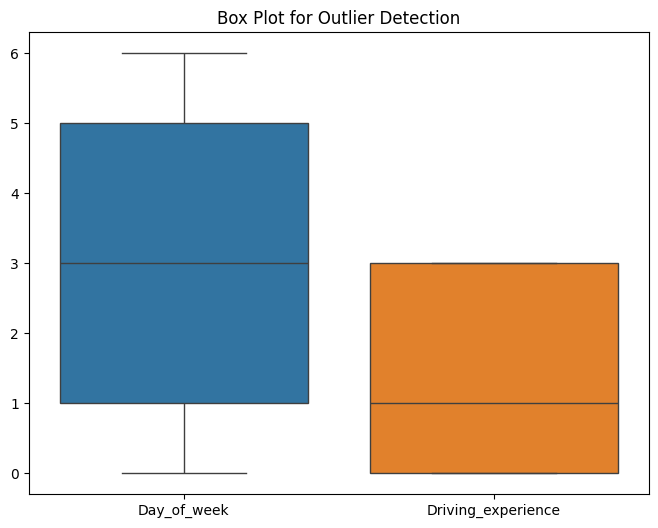

In [194]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Day_of_week', 'Driving_experience']])
plt.title('Box Plot for Outlier Detection')
plt.show()

<Axes: ylabel='Number_of_casualties'>

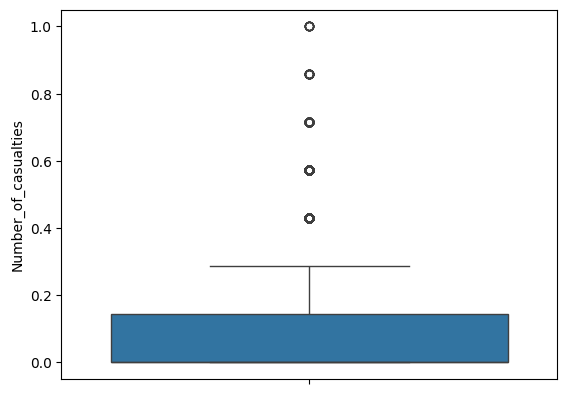

In [195]:
sns.boxplot(df['Number_of_casualties'])

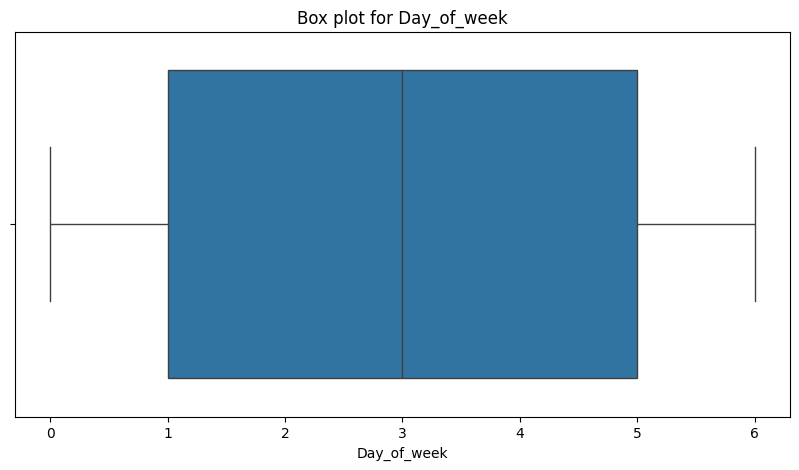

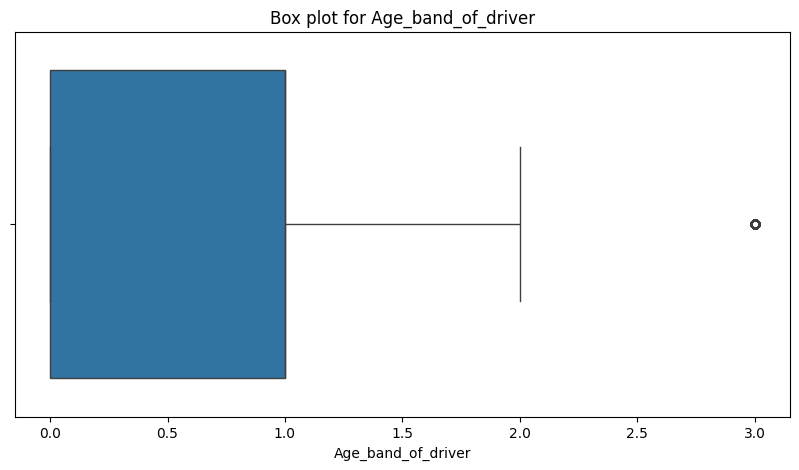

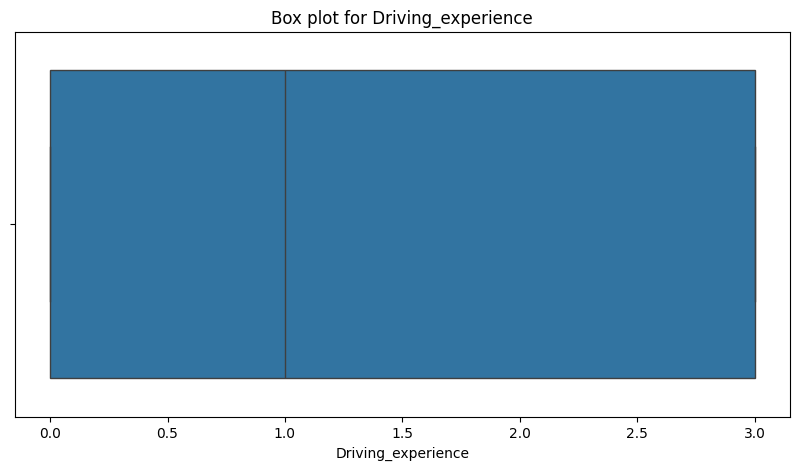

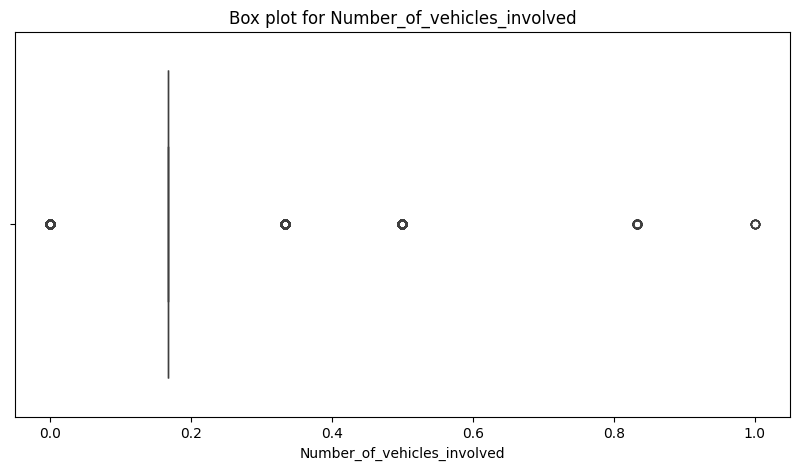

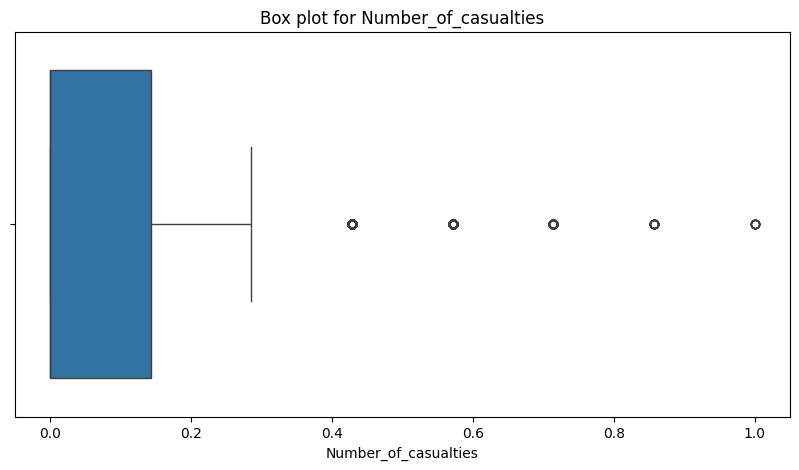

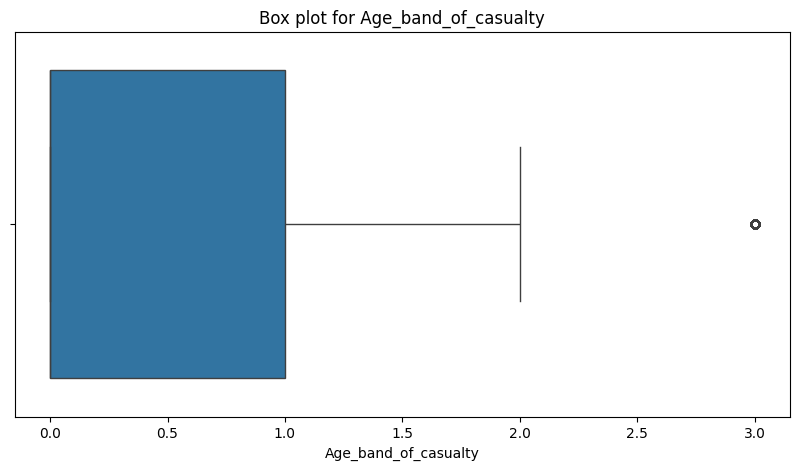

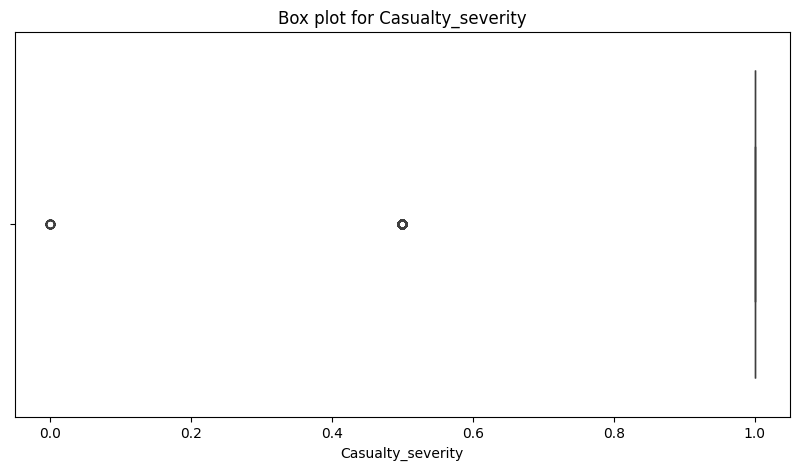

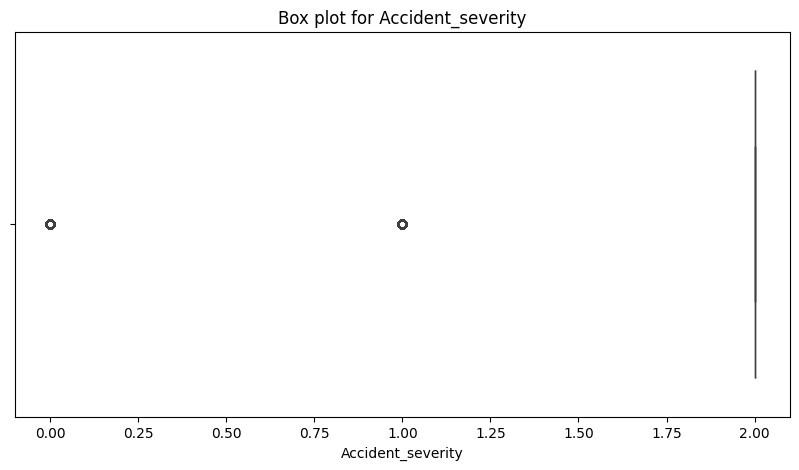

In [196]:
for column in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

In [197]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
df = remove_outliers(df, ['Age_band_of_casualty','Age_band_of_driver'])

**Feature Engineering**

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

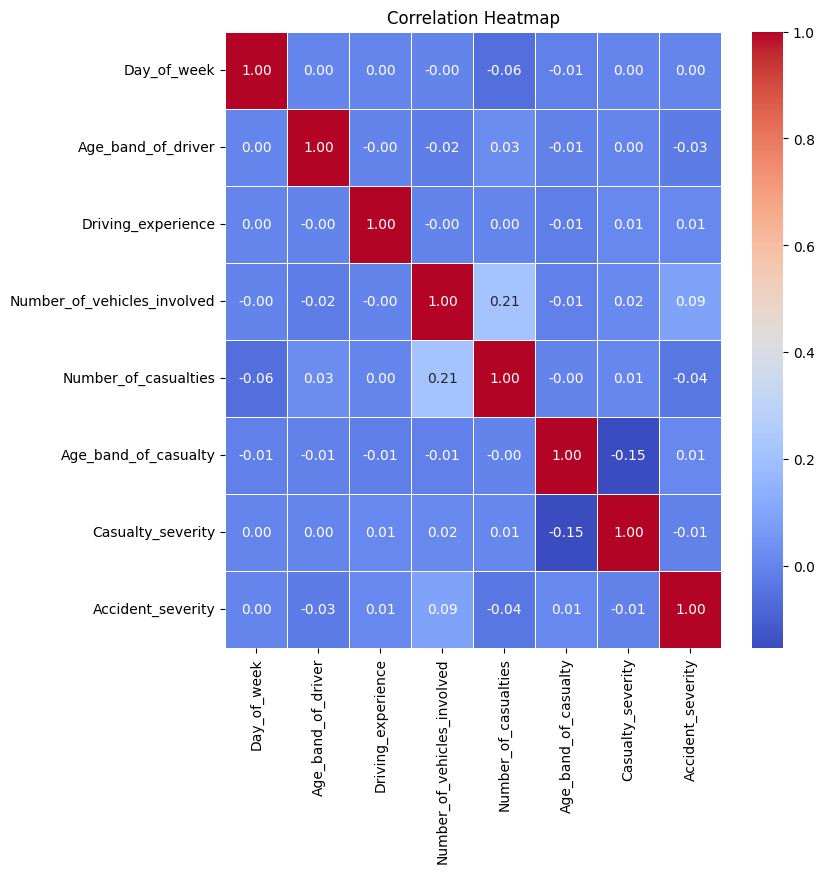

In [198]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
correlation_matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

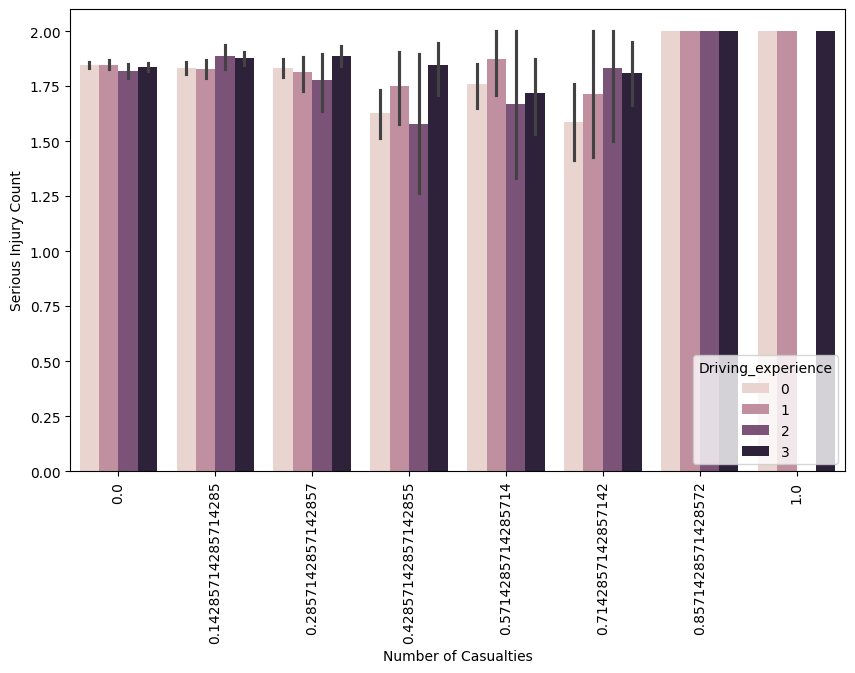

In [199]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Number_of_casualties', y='Accident_severity', hue='Driving_experience', data=df)

plt.xlabel('Number of Casualties')
plt.ylabel('Serious Injury Count')
plt.xticks(rotation=90)
plt.show()

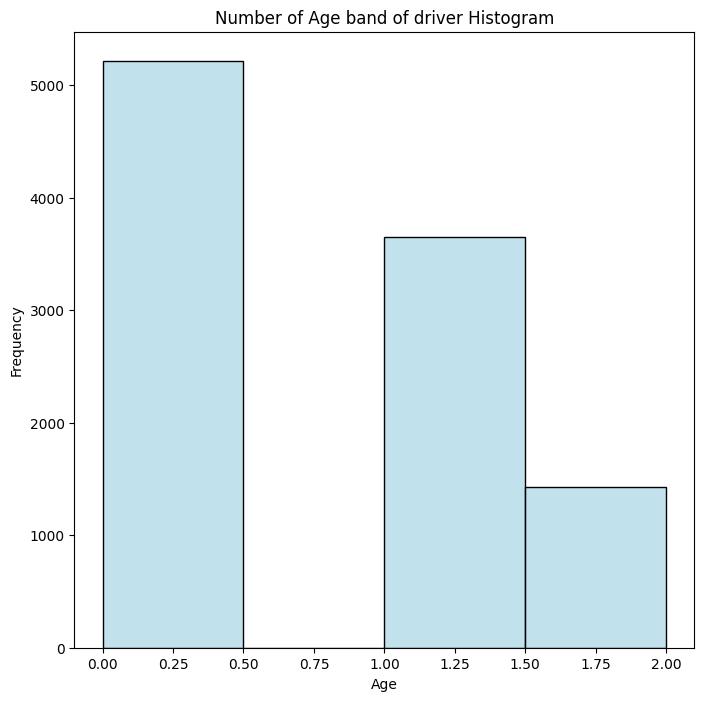

In [200]:
plt.figure(figsize=(8,8))
sns.histplot(df['Age_band_of_driver'], bins= 4, color= 'lightblue')
plt.title('Number of Age band of driver Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-201-11424cbb9f57>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_band_of_driver',data=df,palette='viridis')


Text(0.5, 1.0, ' distribution of the Age band of driver')

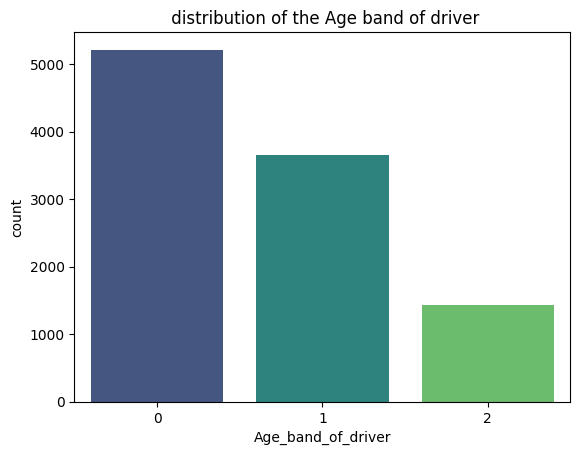

In [201]:
sns.countplot(x='Age_band_of_driver',data=df,palette='viridis')
plt.title(' distribution of the Age band of driver')

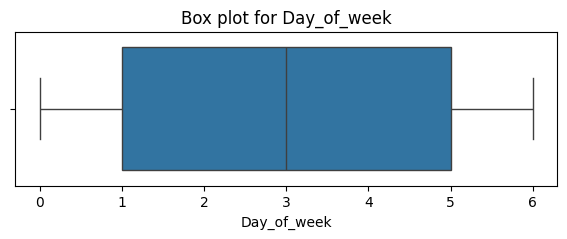

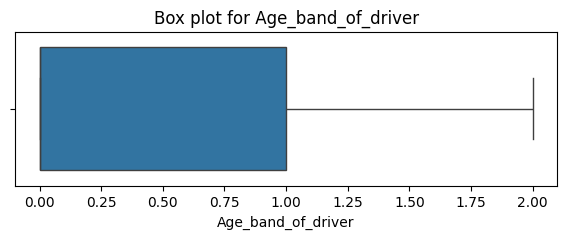

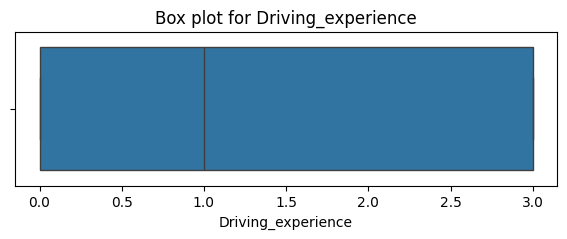

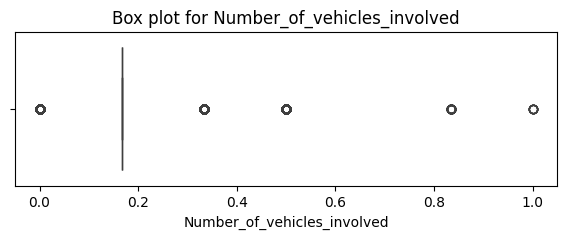

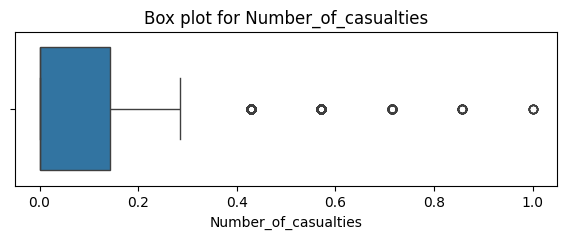

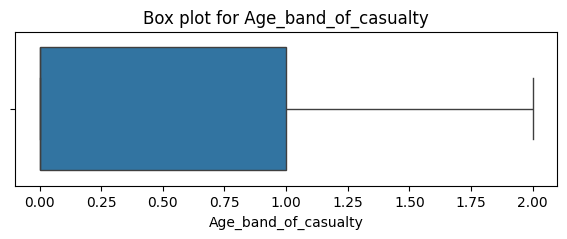

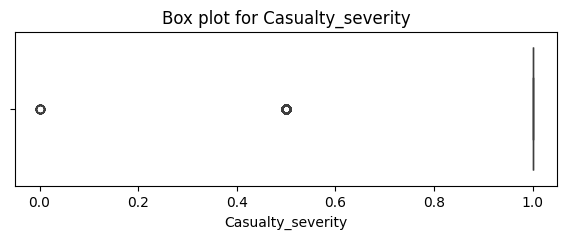

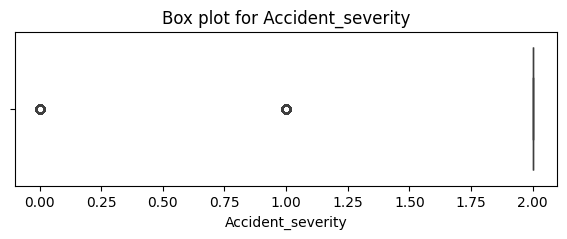

In [202]:
for column in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(7, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

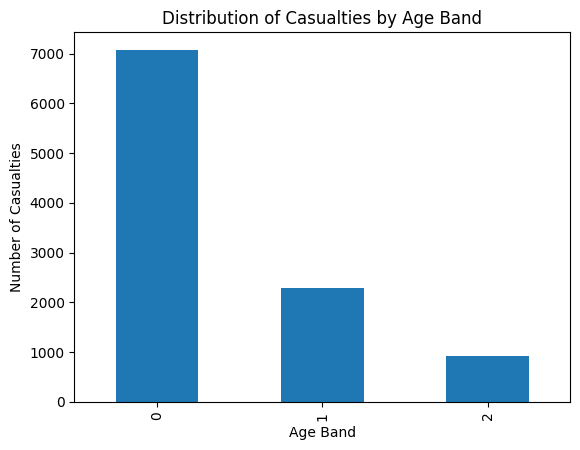

In [203]:
age_distribution = df['Age_band_of_casualty'].value_counts()

age_distribution.plot(kind='bar')
plt.title('Distribution of Casualties by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Number of Casualties')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [204]:
from sklearn.model_selection import train_test_split

X = df.drop(['Accident_severity'], axis=1)
y = df['Accident_severity']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

In [205]:
test = X.iloc[5].values.reshape(1, -1)

#### Logistic Regression

In [206]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs")
log_reg.fit(xtrain, ytrain)

pred = log_reg.predict(test)
print(pred)

[2]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Decision Tree Classifier

In [207]:
tree_cla = DecisionTreeClassifier()
tree_cla.fit(xtrain, ytrain)

pred = tree_cla.predict(test)
print(pred)

[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### Support Vector Machine (SVM)

In [208]:
from sklearn.svm import SVC

svm = SVC(gamma="auto")
svm.fit(xtrain, ytrain)

pred = svm.predict(test)
print(pred)

[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


#### K-Neighbors Classifier

In [209]:
knn_cla = KNeighborsClassifier()
knn_cla.fit(xtrain, ytrain)

pred = knn_cla.predict(test)
print(pred)

[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

Logistic Regression Evaluation

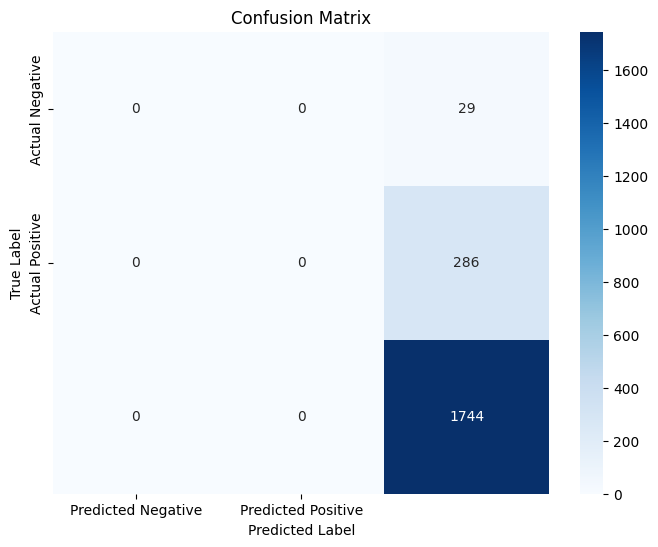

In [210]:
from sklearn.metrics import confusion_matrix

y_pred = log_reg.predict(xtest)

cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [211]:
y_pred = log_reg.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8470
Precision: 0.7174
Recall: 0.8470
F1 Score: 0.7769


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifie Evaluation

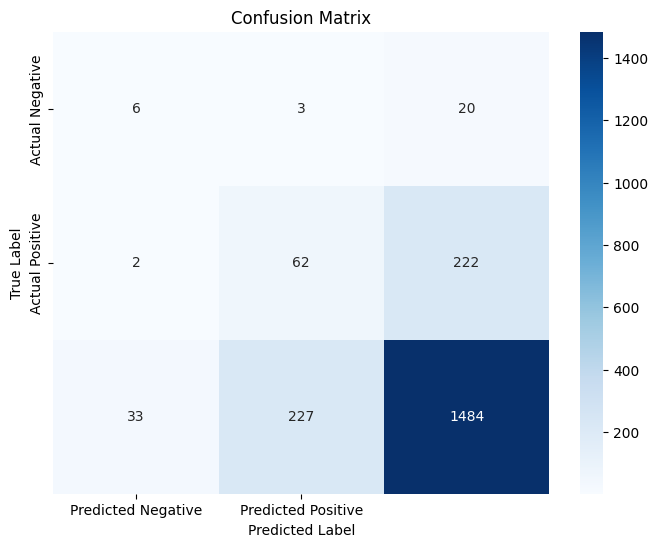

In [212]:
y_pred = tree_cla.predict(xtest)

cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [213]:
y_pred = tree_cla.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.7538
Precision: 0.7598
Recall: 0.7538
F1 Score: 0.7567


Support Vector Machine (SVM) Evaluation

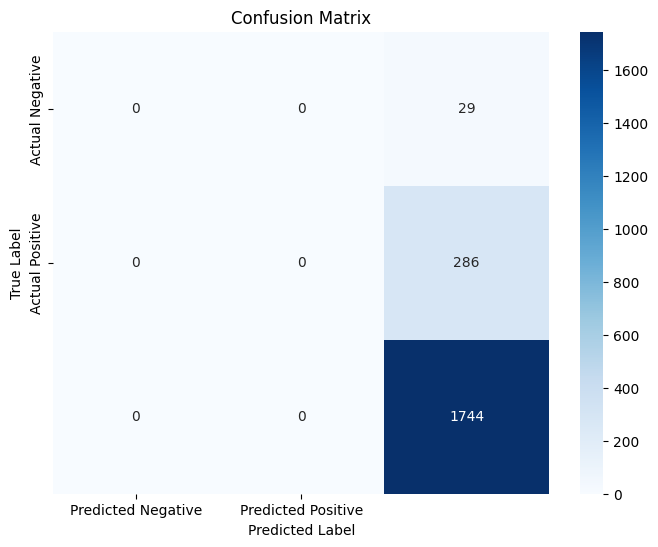

In [214]:
y_pred = svm.predict(xtest)

cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [215]:
y_pred = svm.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8470
Precision: 0.7174
Recall: 0.8470
F1 Score: 0.7769


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Neighbors Classifier Evaluation

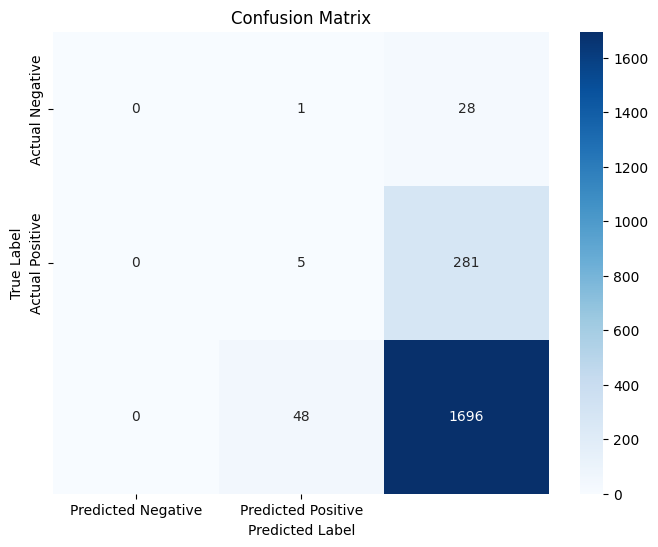

In [219]:
from sklearn.neighbors import KNeighborsClassifier
y_pred = knn_cla.predict(xtest)

cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [220]:
y_pred = knn_cla.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8261
Precision: 0.7293
Recall: 0.8261
F1 Score: 0.7704


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Comparing Metrics:
SVM and Logistic Regression: Same performance (Accuracy: 0.8470, Precision: 0.7174, Recall: 0.8470, F1: 0.7769).
KNN: Close performance (Accuracy: 0.8261, Precision: 0.7293, Recall: 0.8261, F1: 0.7704).
Decision Tree: Lower performance (Accuracy: 0.7538, Precision: 0.7598, Recall: 0.7538, F1: 0.7567).

Model Choice:
SVM or Logistic Regression: Best overall performance, especially with the current data.

Model Limitations:
SVM: Complex with large datasets.
KNN: Sensitive to noise.
Decision Tree: Prone to overfitting.

Future Improvements:
Hyperparameter tuning, trying different models, or better feature engineering.